In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../web-app/

/Users/dorislee/Desktop/Fall2016/Research/seg/crowd-seg/web-app


In [3]:
%load_ext autoreload
%autoreload 2
from analysis_toolbox import *

In [4]:
import ast
import matplotlib.image as mpimg
save_db_as_csv()
img_info,object_tbl,bb_info,hit_info = load_info()

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


# Drawing bounding box and annotations  collected from our UI 

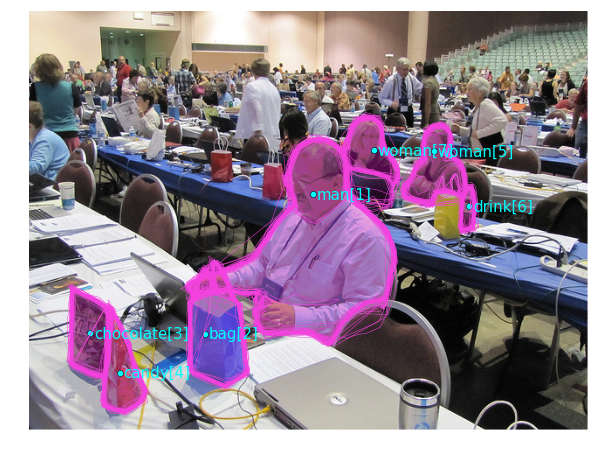

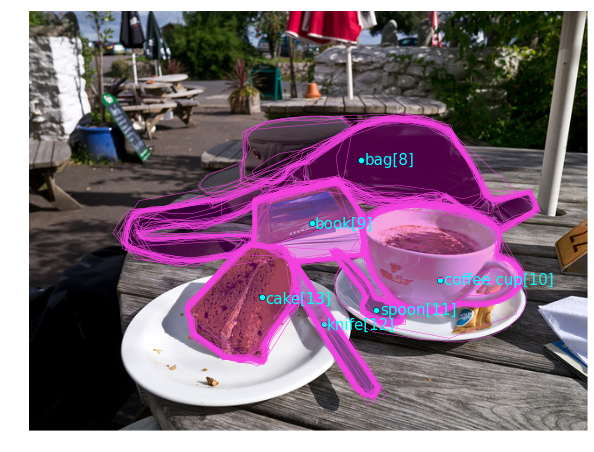

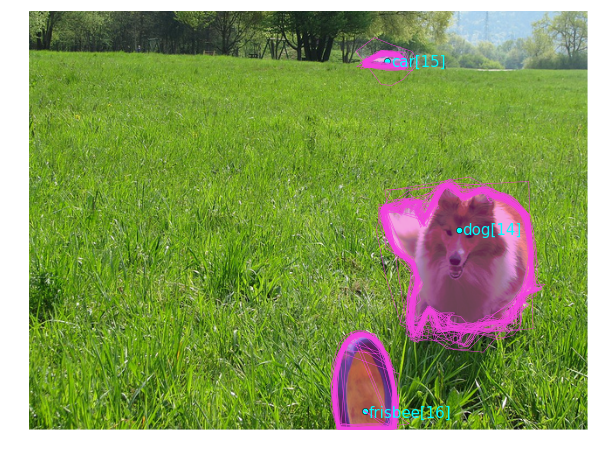

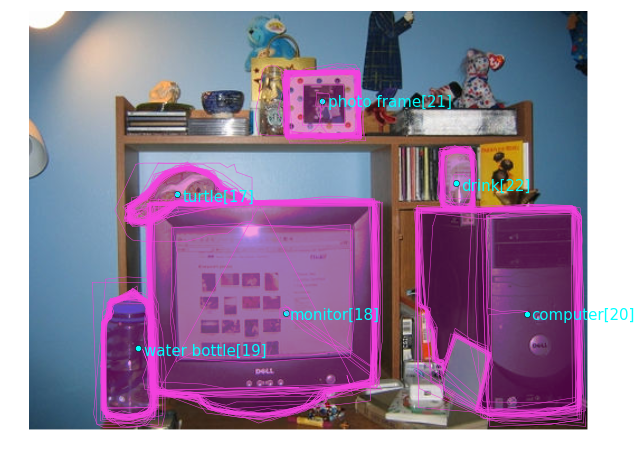

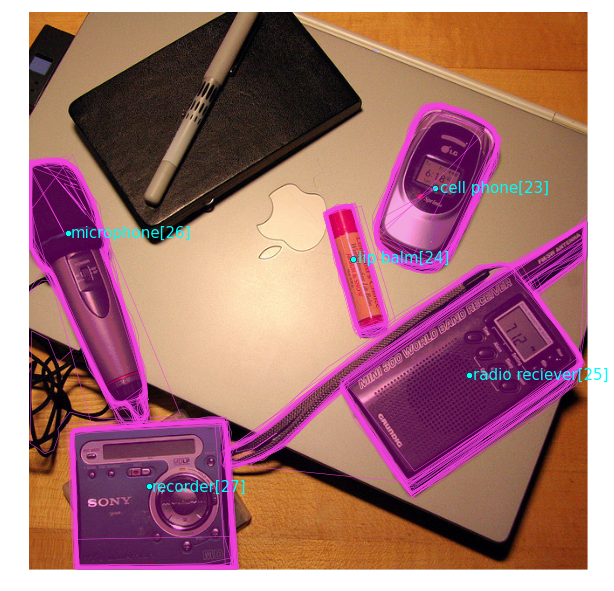

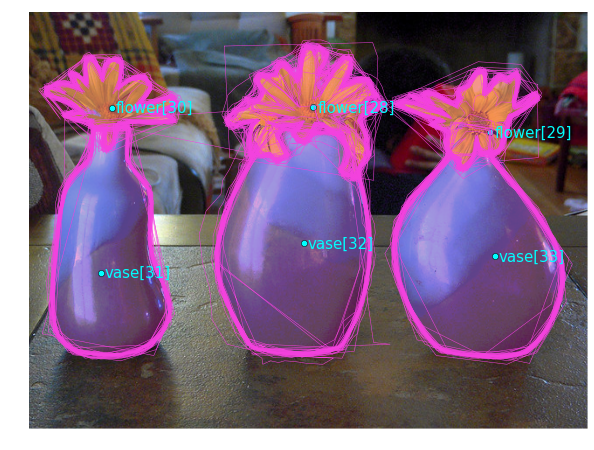

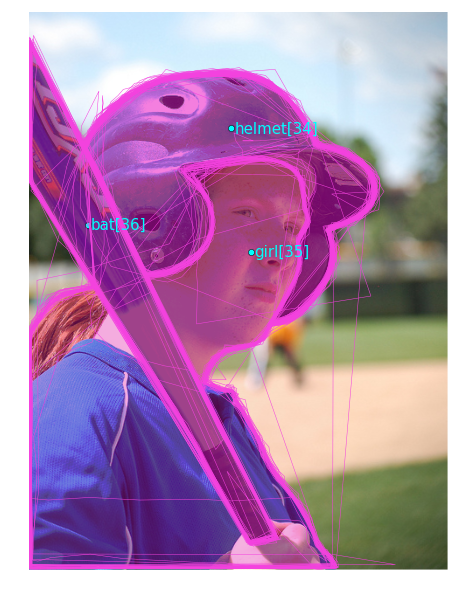

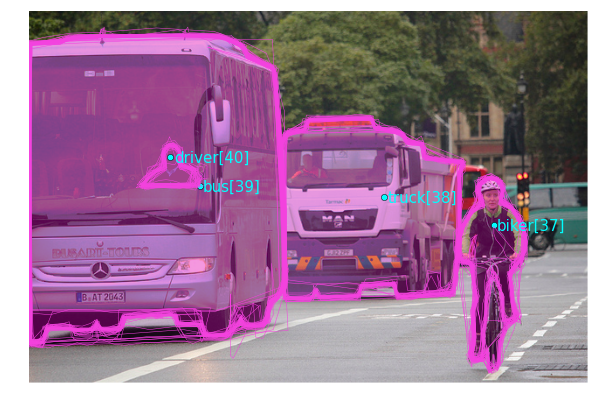

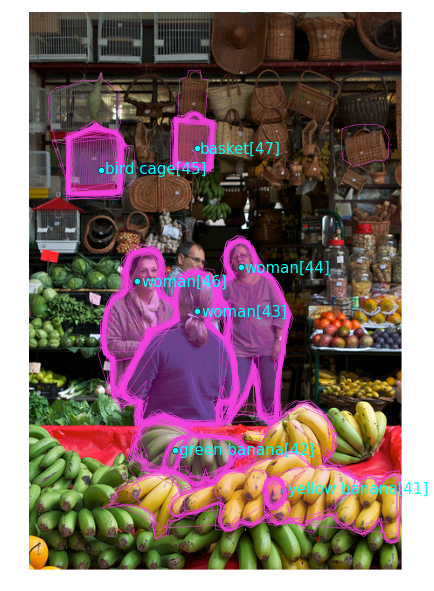

In [15]:
for i in np.arange(len(img_info)):
    img_name = img_info["filename"][i]
    if 'COCO' in img_name:
        fname = "app/static/"+img_name+".png"
        img=mpimg.imread(fname)
        width,height = get_size(fname)
        plt.figure(figsize =(10,10))
        plt.imshow(img)
        plt.axis("off")
        filtered_object_tbl = object_tbl[object_tbl["image_id"]==i+1]
        plt.plot(filtered_object_tbl["x_loc"],filtered_object_tbl["y_loc"],'o',color="cyan")
        for name, x,y,oid  in zip(filtered_object_tbl["name"],filtered_object_tbl["x_loc"],filtered_object_tbl["y_loc"],filtered_object_tbl["object_id"]):
            plt.text(x+5,y+5,name+"[{}]".format(oid), fontsize=15,color='cyan')
        #Draw Collected Bounding Boxes
        colors=cm.rainbow(np.linspace(0,1,50))
        for oid,bbx_path,bby_path in zip(bb_info["object_id"],bb_info["x_locs"],bb_info["y_locs"]):
            if int(object_tbl[object_tbl.object_id==oid].image_id) ==i+1:
                x_locs = [x for x in ast.literal_eval(bbx_path) if x is not None]
                y_locs = [y for y in ast.literal_eval(bby_path) if y is not None]
                # Append the starting point again in the end to close the BB
                x_locs.append(x_locs[0])
                y_locs.append(y_locs[0])
                plt.plot(x_locs,y_locs,'-',color="#f442df",linewidth=0.5)
                #plt.plot(x_locs,y_locs,'-',color=colors[oid],linewidth=0.5)
                plt.fill_between(x_locs,y_locs,color="none",facecolor='#f442df', alpha=0.01)
        plt.xlim(0,width)
        plt.ylim(height,0)